# Tesla Univarite Stock Forecasat with LSTM

# Install Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

# Load the Data

In [ ]:
df = pd.read_csv("/content/TSLA (2).csv")

In [ ]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


In [ ]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
3529,3529,2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900
3530,3530,2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
3531,3531,2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
3532,3532,2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400
3533,3533,2024-07-15,255.964996,265.579987,251.729996,252.639999,142831728


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3534 non-null   int64  
 1   Date        3534 non-null   object 
 2   Open        3534 non-null   float64
 3   High        3534 non-null   float64
 4   Low         3534 non-null   float64
 5   Close       3534 non-null   float64
 6   Volume      3534 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 193.4+ KB


In [ ]:
# Create a date range for filtering
start_date = '2023-07-01'
end_date = '2024-07-15'

# Convert 'date' column to datetime if it isn't already
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print(filtered_df)


      Unnamed: 0       Date        Open        High         Low       Close  \
3274        3274 2023-07-03  276.489990  284.250000  275.109985  279.820007   
3275        3275 2023-07-05  278.820007  283.850006  277.600006  282.480011   
3276        3276 2023-07-06  278.089996  279.970001  272.880005  276.540009   
3277        3277 2023-07-07  278.429993  280.779999  273.769989  274.429993   
3278        3278 2023-07-10  276.470001  277.519989  265.100006  269.609985   
...          ...        ...         ...         ...         ...         ...   
3529        3529 2024-07-09  251.000000  265.609985  250.300003  262.329987   
3530        3530 2024-07-10  262.799988  267.589996  257.859985  263.260010   
3531        3531 2024-07-11  263.299988  271.000000  239.649994  241.029999   
3532        3532 2024-07-12  235.800003  251.839996  233.089996  248.229996   
3533        3533 2024-07-15  255.964996  265.579987  251.729996  252.639999   

         Volume  
3274  119685900  
3275  131530900

In [ ]:
df = filtered_df.copy()

In [ ]:
# Preprocessing data (focus on 'Close' price)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']].values

# Preprocess the Data

In [ ]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Prepare training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
# Create dataset matrix for LSTM
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM Model

In [ ]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model

In [ ]:
# Fit the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2782
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0428
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0372
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0217
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0207
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0163
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0135
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0136
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0139
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0092
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0101
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━

# Prediction

In [ ]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step


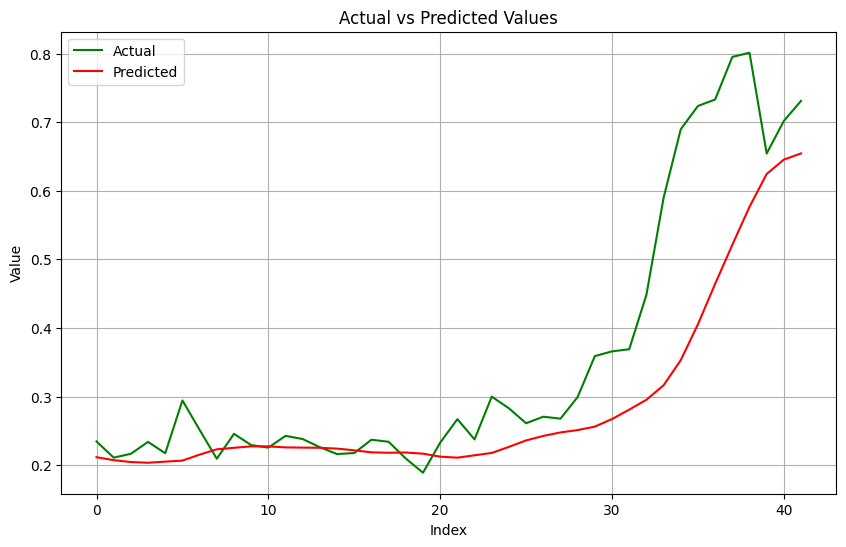

In [ ]:
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the test data
plt.plot(y_test, color='green', label='Actual')

# Plot the predicted data
plt.plot(y_pred, color='red', label='Predicted')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

# Add a legend
plt.legend()

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


# Next 30 Days Forecasting

In [ ]:
# Forecasting the next 30 days
def forecast_next_days(model, last_sequence, days=30):
    forecasted = []
    current_sequence = last_sequence

    for _ in range(days):
        predicted_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
        forecasted.append(predicted_value)
        current_sequence = np.append(current_sequence[1:], predicted_value).reshape(-1, 1)

    return forecasted



In [ ]:
# Use the last available data point for forecasting
last_sequence = X_test[-1]
predicted_values = forecast_next_days(model, last_sequence, days=30)

# Inverse scale the predicted values
predicted_values_rescaled = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

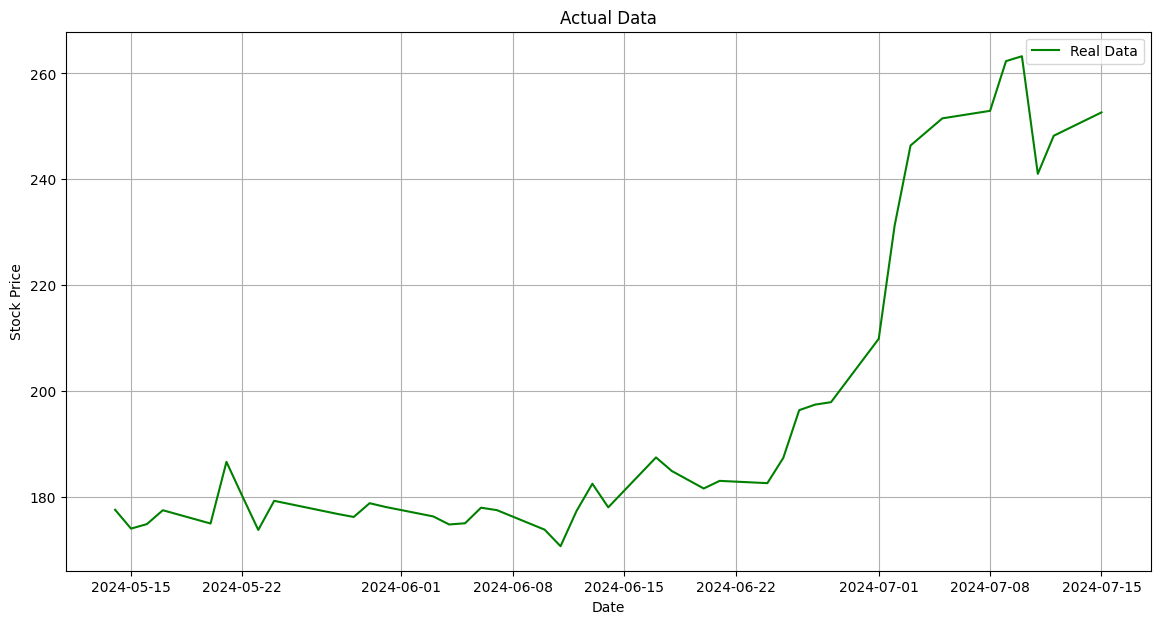

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(test_data[look_back:]), label='Real Data',color='green')

plt.title('Actual Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

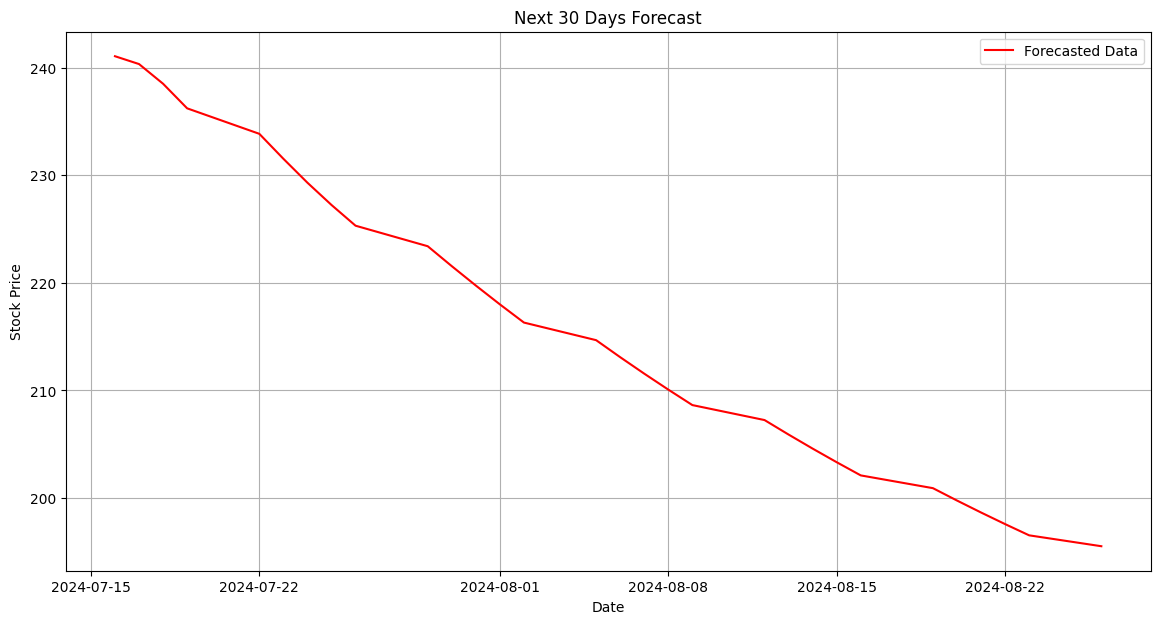

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(pd.date_range(df.index[-1], periods=31, freq='B')[1:], predicted_values_rescaled, label='Forecasted Data',color='red')
plt.title('Next 30 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

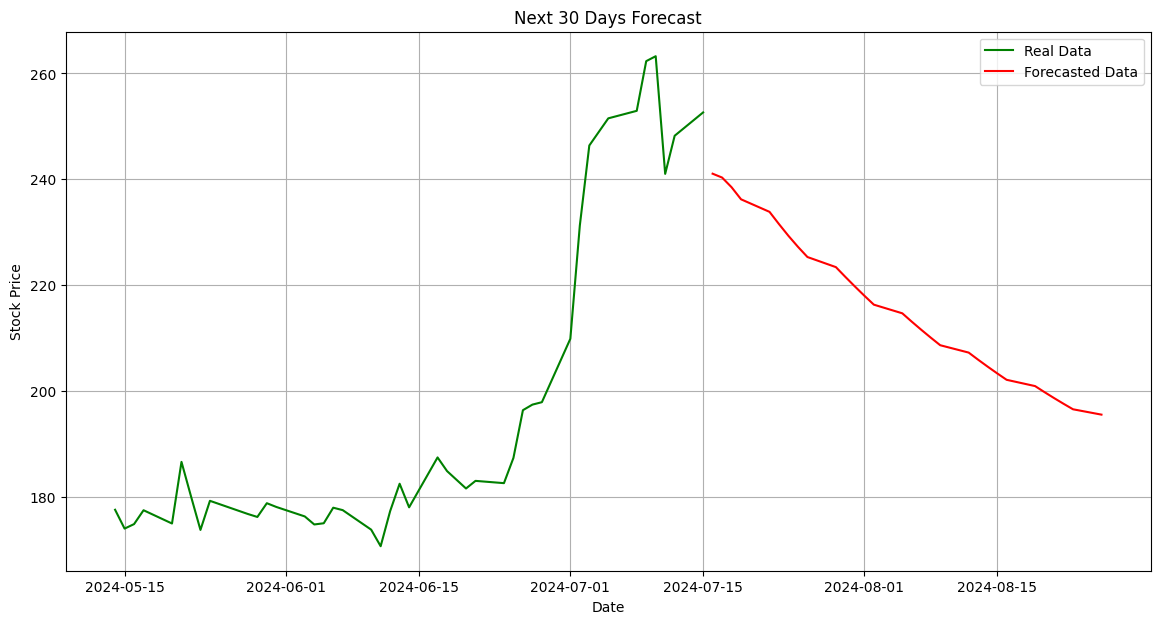

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(test_data[look_back:]), label='Real Data',color='green')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='B')[1:], predicted_values_rescaled, label='Forecasted Data',color='red')
plt.title('Next 30 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# Next 90 Days Forecast

In [ ]:
# Use the last available data point for forecasting
last_sequence = X_test[-1]
predicted_values = forecast_next_days(model, last_sequence, days=90)

# Inverse scale the predicted values
predicted_values_rescaled = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

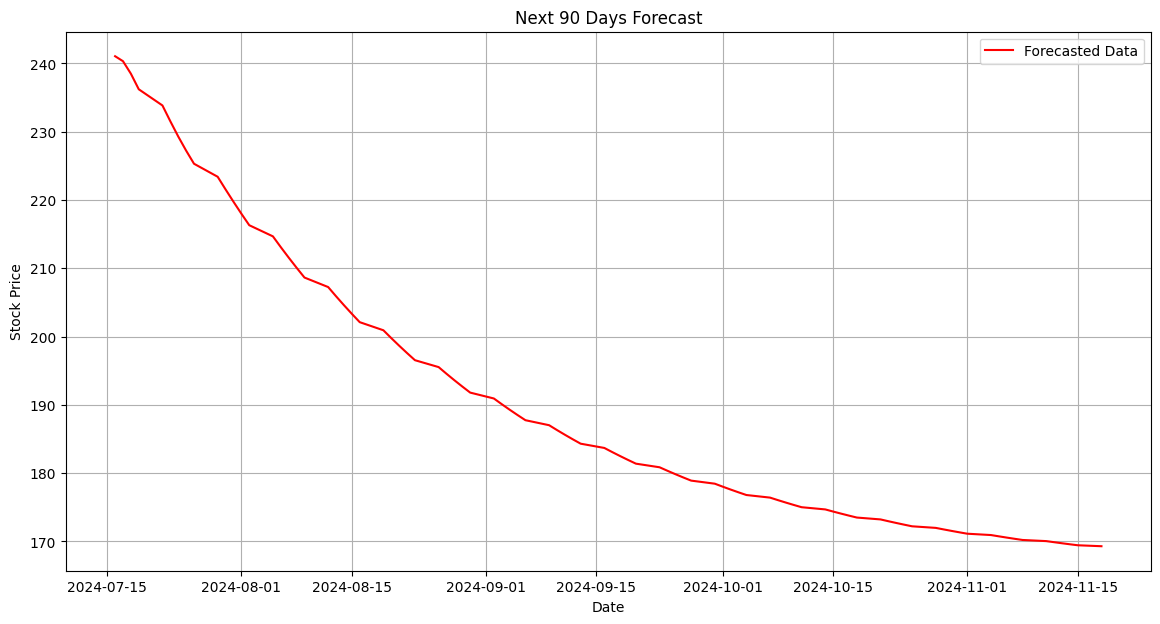

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))

plt.plot(pd.date_range(df.index[-1], periods=91, freq='B')[1:], predicted_values_rescaled, label='Forecasted Data',color='red')
plt.title('Next 90 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

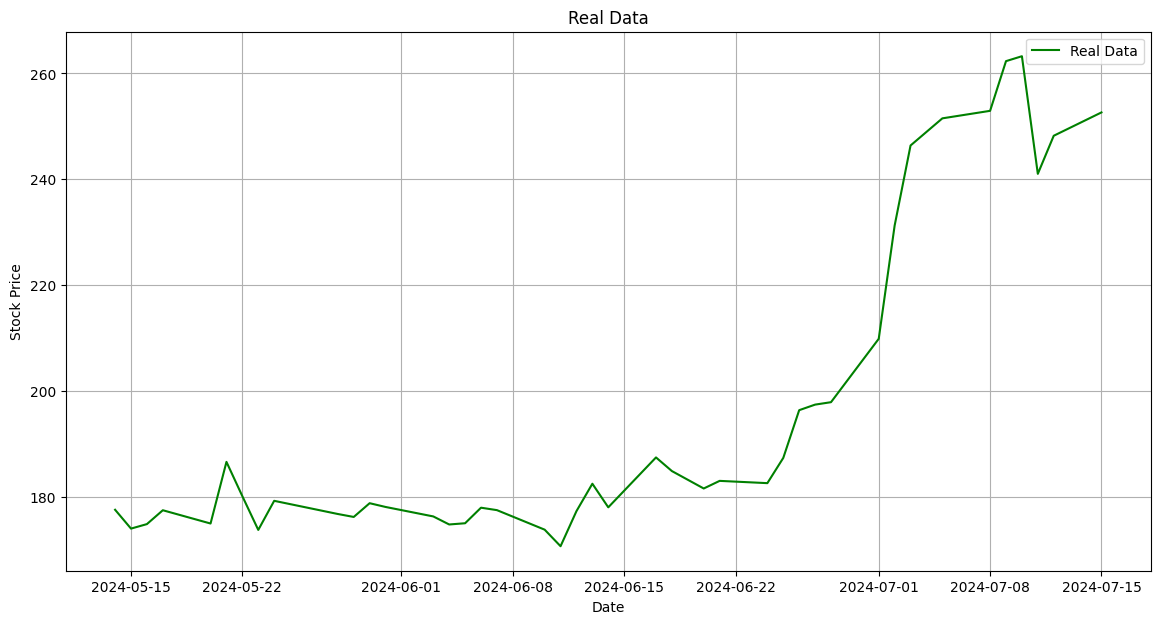

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(test_data[look_back:]), label='Real Data',color='green')
plt.title('Real Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

plt.show()

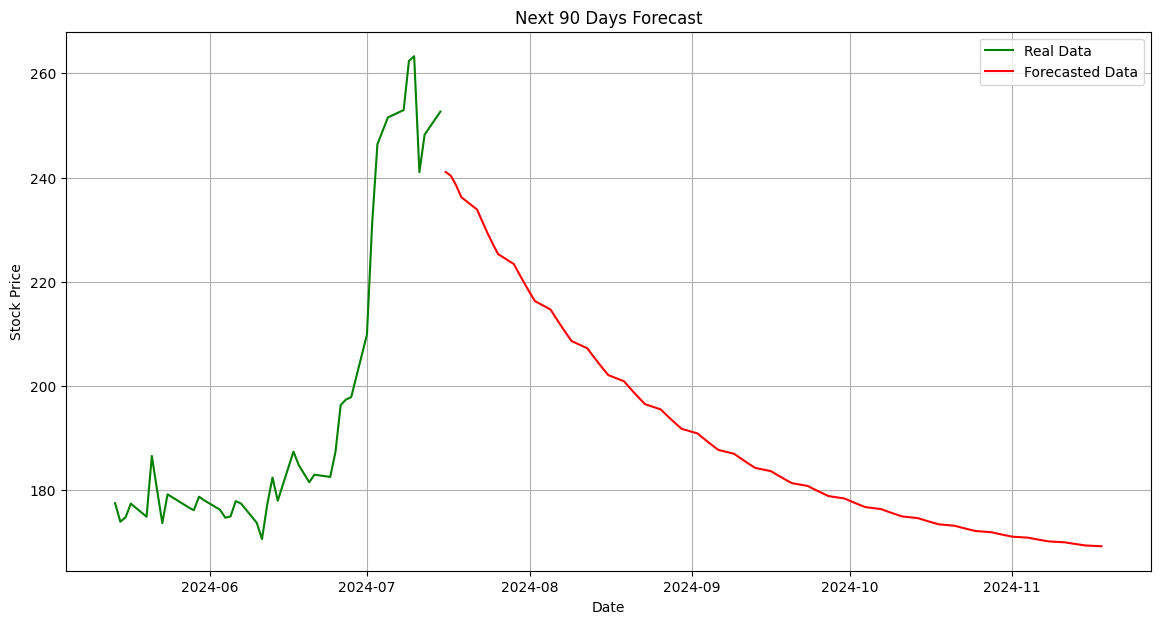

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(test_data[look_back:]), label='Real Data',color='green')
plt.plot(pd.date_range(df.index[-1], periods=91, freq='B')[1:], predicted_values_rescaled, label='Forecasted Data',color='red')
plt.title('Next 90 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()